In [1]:
import numpy as np
from utils import GamblerProblemModel, VIApproach, plot_value_iteration, plot_estimate_evolution
from time import time

In [2]:
PRECISION = 4
CONVERGENCE = 10e-8

In [3]:
p = GamblerProblemModel(goal=100, success_probability=0.4)
p.n_states, p.n_nonterminal_states, p.n_actions

(101, 99, 50)

In [4]:
tp = p.define_transition_probability_matrices()
tp.shape

(50, 101, 101)

In [5]:
# transition probability matrix for bet of 3$
a3 = tp[2]
a3.sum(axis=1)

array([0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.])

In [6]:
a3[3:10, :13]

array([[0.6, 0. , 0. , 0. , 0. , 0. , 0.4, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.6, 0. , 0. , 0. , 0. , 0. , 0.4, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.6, 0. , 0. , 0. , 0. , 0. , 0.4, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.6, 0. , 0. , 0. , 0. , 0. , 0.4, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.6, 0. , 0. , 0. , 0. , 0. , 0.4, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0. , 0. , 0. , 0. , 0.4, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0. , 0. , 0. , 0. , 0.4]])

Time taken: 0.0075 s, i.e. 0.000327 s per iteration


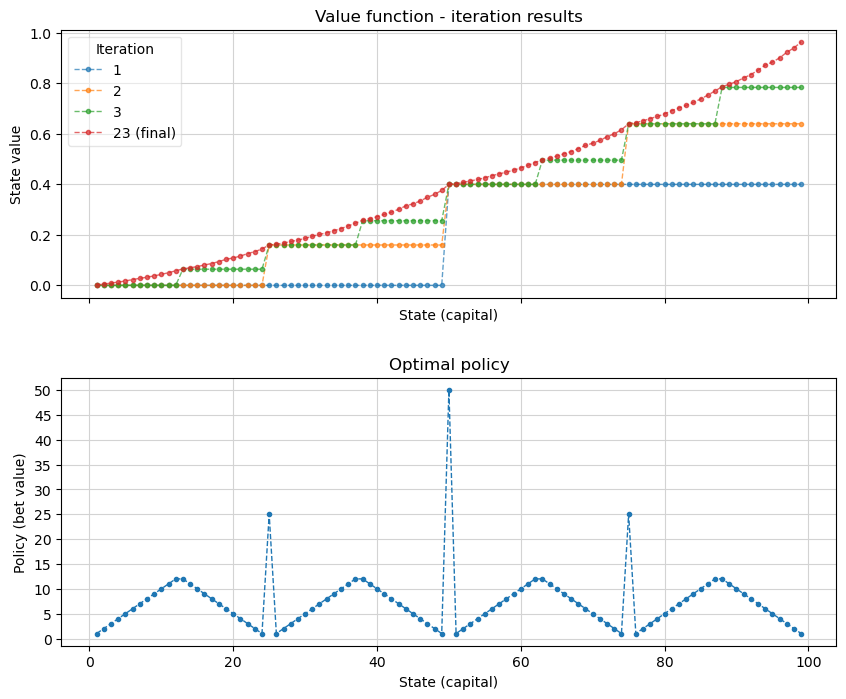

In [7]:
t0 = time()
vec_v_track, vec_pi_track, _ = p.run_value_iteration(convergence=CONVERGENCE, keep_track=True, precision=PRECISION)
t1 = time()
print(f"Time taken: {t1 - t0:.4f} s, i.e. {(t1-t0)/len(vec_v_track):6f} s per iteration")

plot_value_iteration(vec_v_track, vec_pi_track)

Time taken: 0.6338 s, i.e. 0.027557 s per iteration


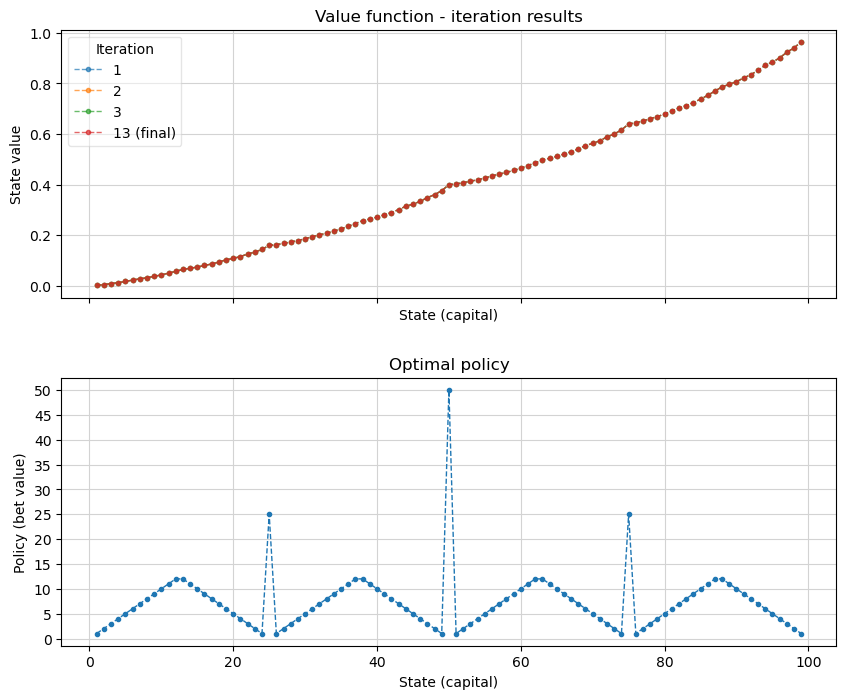

In [8]:
t0 = time()
ip_v_track, ip_pi_track, _ = p.run_value_iteration(
    convergence=CONVERGENCE, keep_track=True, approach=VIApproach.IN_PLACE, precision=PRECISION)
t1 = time()
print(f"Time taken: {t1 - t0:.4f} s, i.e. {(t1-t0)/len(vec_v_track):6f} s per iteration")

plot_value_iteration(ip_v_track, ip_pi_track)


In [9]:
policy_diff = vec_pi_track[-1] - ip_pi_track[-1]
policy_diff

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
values_diff = vec_v_track[-1] - ip_v_track[-1]
values_diff

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -4.05781638e-09, -5.51863028e-09,
       -4.05781638e-09, -1.86659554e-08, -2.74308387e-08, -3.26897688e-08,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.43468982e-09,
       -2.43468982e-09, -1.64585033e-08, -2.43468983e-08, -2.43468983e-08,
       -2.58077122e-08, -3.89550373e-08, -3.98315256e-08, -4.82458136e-08,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -3.31117816e-09, -1.11995732e-08, -1.96138613e-08, -2.43468983e-08,
       -2.58077122e-08, -3.42220002e-08, -3.89550373e-08, -4.77199207e-08,
       -5.32943865e-08,  0.00000000e+00,  0.00000000e+00, -6.71974393e-09,
       -1.46081390e-08, -2.05332002e-08, -2.86319524e-08, -3.65203475e-08,
       -4.05521938e-08, -4.88402676e-08, -5.84325560e-08, -6.58245080e-08,
       -7.60150521e-08,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [11]:
values_diff.max(), values_diff.min(), np.where(values_diff, 1, 0).sum()

(np.float64(0.0), np.float64(-1.1432927904397872e-07), np.int64(75))

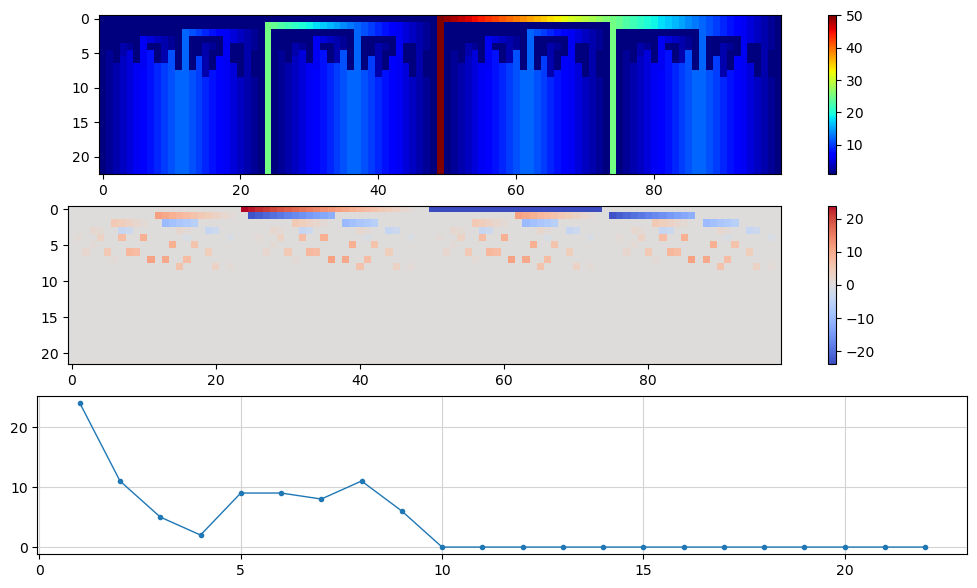

In [12]:

plot_estimate_evolution(vec_pi_track)


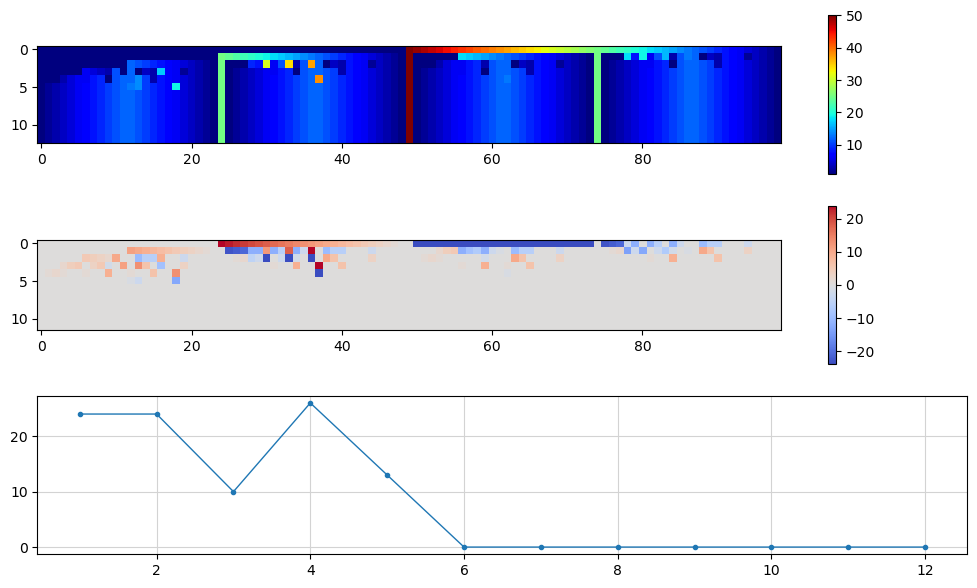

In [13]:
plot_estimate_evolution(ip_pi_track)

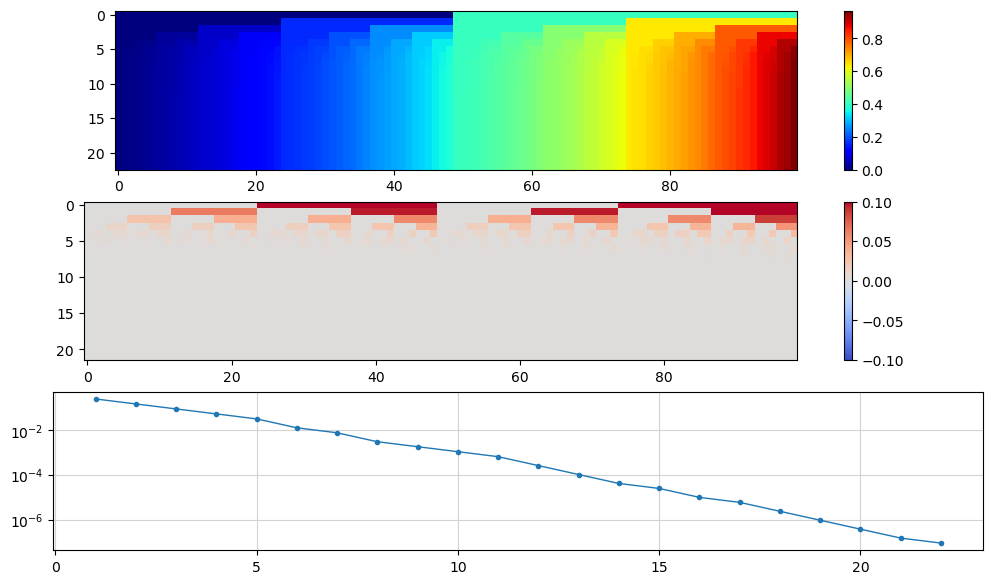

In [15]:
plot_estimate_evolution(vec_v_track, log_scale_diff=True)